In [1199]:
#Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error

In [1200]:
data = pd.read_csv('../diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [1201]:
data.shape

(768, 9)

In [1202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [1203]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [1204]:
select_col = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [1205]:
select_col_df = data[select_col]
select_col_df = select_col_df.describe()
select_col_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578
std,31.972618,19.355807,15.952218,115.244002,7.884160
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000
50%,117.000000,72.000000,23.000000,30.500000,32.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000
max,199.000000,122.000000,99.000000,846.000000,67.100000


In [1206]:
mean_value = select_col_df.iloc[1:2, :].values[0]
mean_value

array([120.89453125,  69.10546875,  20.53645833,  79.79947917,
        31.99257812])

In [1207]:
for col in data[select_col]:

    data.replace({col: {0: data[col].median()}}, inplace=True)




In [1208]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1


In [1209]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


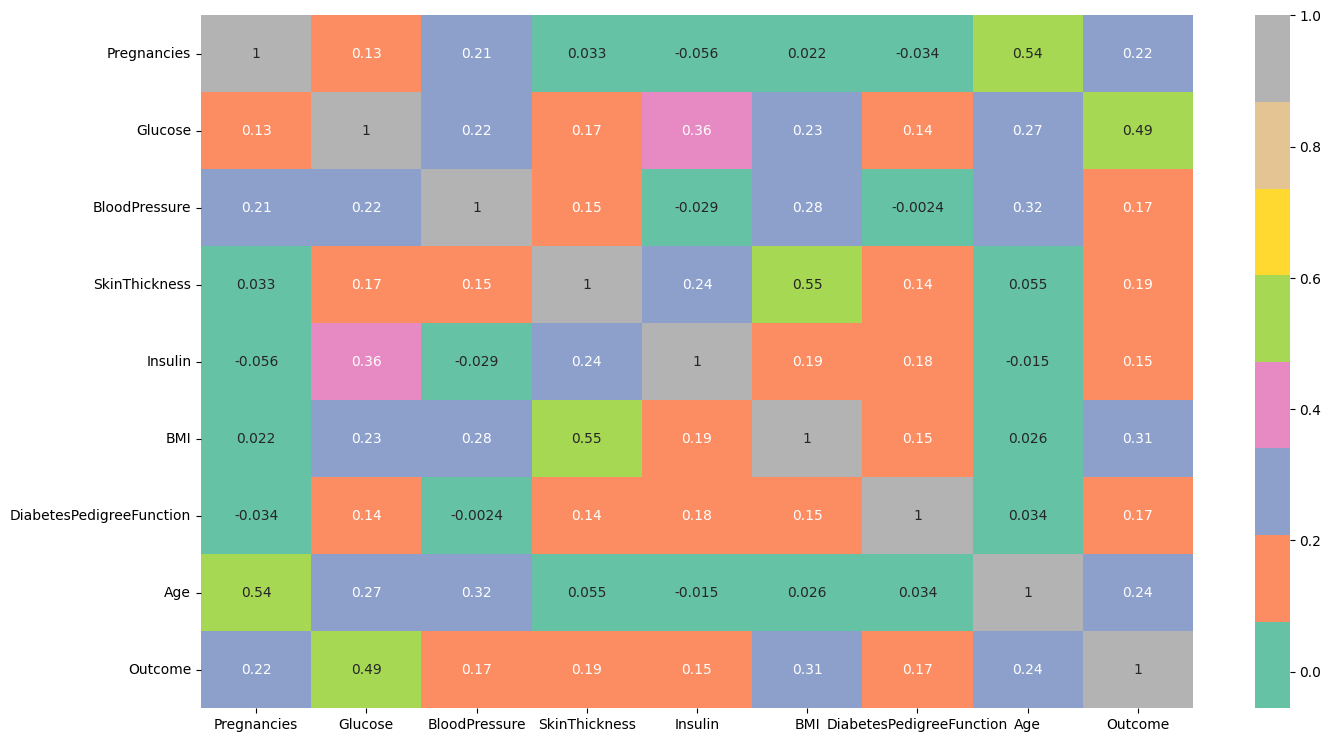

In [1210]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(), annot=True, cmap='Set2')
plt.show()

In [1211]:
# training and normalization of data

X = data.iloc[:, :8]
Y = data.iloc[:, 8:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state=1)

In [1212]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
663,9,145,80,46,130.0,37.9,0.637,40
712,10,129,62,36,30.5,41.2,0.441,38
161,7,102,74,40,105.0,37.2,0.204,45
509,8,120,78,23,30.5,25.0,0.409,64
305,2,120,76,37,105.0,39.7,0.215,29
...,...,...,...,...,...,...,...,...
645,2,157,74,35,440.0,39.4,0.134,30
715,7,187,50,33,392.0,33.9,0.826,34
72,13,126,90,23,30.5,43.4,0.583,42
235,4,171,72,23,30.5,43.6,0.479,26


In [1213]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
285,7,136,74,26,135.0,26.0,0.647,51
101,1,151,60,23,30.5,26.1,0.179,22
581,6,109,60,27,30.5,25.0,0.206,27
352,3,61,82,28,30.5,34.4,0.243,46
726,1,116,78,29,180.0,36.1,0.496,25
...,...,...,...,...,...,...,...,...
563,6,99,60,19,54.0,26.9,0.497,32
318,3,115,66,39,140.0,38.1,0.150,28
154,8,188,78,23,30.5,47.9,0.137,43
684,5,136,82,23,30.5,32.0,0.640,69


In [1214]:
X_train.shape

(614, 8)

In [1215]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Y_test = scaler.fit_transform(y_test)
# Y_train = scaler.fit_transform(y_train)

In [1216]:
# knn = KNeighborsClassifier(n_neighbors=13)
# knn.fit(X_train, y_train)

In [1217]:
test_accuracy = []
test_mse_value = []
train_accuracy = []
train_mse_value = []
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)
for i  in range(1,30):

    knn = KNeighborsClassifier(n_neighbors=i)
  
    knn.fit(X_train,y_train)

    test_pred = knn.predict(X_test)
    train_pred = knn.predict(X_train)


    test_acc = accuracy_score(y_test, test_pred) 
    train_acc = accuracy_score(y_train,train_pred)


    mse1 = mean_squared_error(y_test, test_pred)
    mse2 = mean_squared_error(y_train, train_pred)


    test_accuracy.append(test_acc)
    train_accuracy.append(train_acc)

    test_mse_value.append(mse1)
    train_mse_value.append(mse2)


In [1218]:
# y_pred = knn.predict(X_test)

# accuracy_score(y_test, y_pred)

In [1219]:
# scores = [accuracy_score(y_test, KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train).predict(X_test)) for i in range(1, 16)]

In [1220]:
print("Test Accuracy:", test_accuracy)
print("Train Accuracy:", train_accuracy)
print("Test MSE:", test_mse_value)
print("Train MSE:", train_mse_value)

Test Accuracy: [0.6688311688311688, 0.7142857142857143, 0.7532467532467533, 0.7532467532467533, 0.7792207792207793, 0.7662337662337663, 0.8246753246753247, 0.7987012987012987, 0.8181818181818182, 0.8116883116883117, 0.8051948051948052, 0.8181818181818182, 0.8311688311688312, 0.8051948051948052, 0.7987012987012987, 0.7987012987012987, 0.8116883116883117, 0.8051948051948052, 0.8116883116883117, 0.8181818181818182, 0.8116883116883117, 0.7987012987012987, 0.7987012987012987, 0.7792207792207793, 0.7792207792207793, 0.7922077922077922, 0.7857142857142857, 0.7922077922077922, 0.7922077922077922]
Train Accuracy: [1.0, 0.8355048859934854, 0.8322475570032574, 0.7931596091205212, 0.8078175895765473, 0.7947882736156352, 0.7785016286644951, 0.7931596091205212, 0.7996742671009772, 0.7850162866449512, 0.7899022801302932, 0.7850162866449512, 0.7866449511400652, 0.7899022801302932, 0.7947882736156352, 0.7866449511400652, 0.7833876221498371, 0.7768729641693811, 0.7768729641693811, 0.7719869706840391, 0.

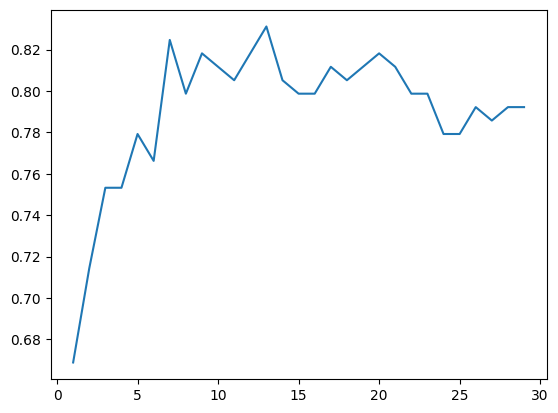

In [1221]:
plt.plot(range(1,30), test_accuracy)

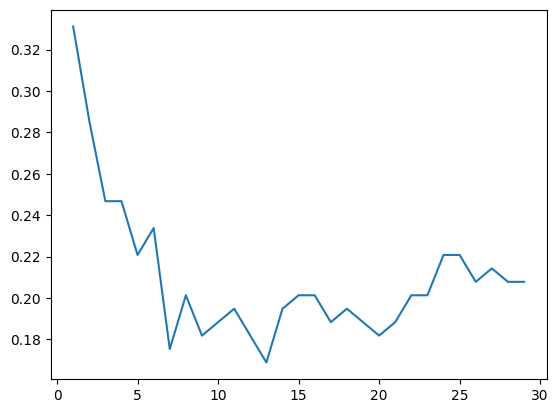

In [1222]:
plt.plot(range(1,30), test_mse_value)

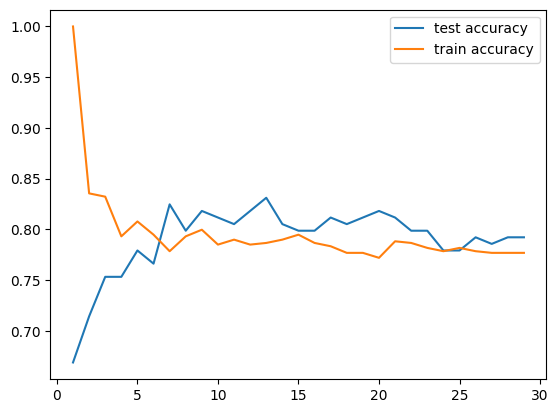

In [1223]:
plt.plot(range(1,30), test_accuracy, label = 'test accuracy')
plt.plot(range(1,30), train_accuracy, label='train accuracy')
plt.legend()
plt.show()

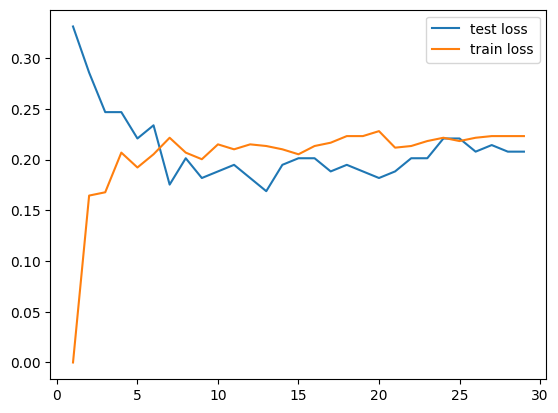

In [1224]:
plt.plot(range(1,30), test_mse_value, label = 'test loss')
plt.plot(range(1,30), train_mse_value, label='train loss')
plt.legend()
plt.show()

In [1225]:
max_score = np.argmax(np.array(test_accuracy)) + 1
max_score

13

In [1226]:
knn = KNeighborsClassifier( n_neighbors= 13)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

accuracy_score = accuracy_score(y_test, y_pred)

accuracy_score

0.8311688311688312

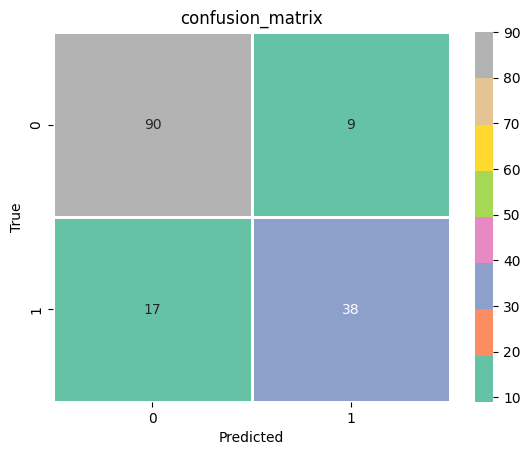

In [1227]:
class_label=[0,1]

cm = confusion_matrix(y_test,y_pred)

df = pd.DataFrame(cm, index=class_label, columns=class_label)

sns.heatmap(df, annot=True, cmap='Set2', linewidths=2, fmt='d')
plt.title('confusion_matrix')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [1228]:


# d = X_test.iloc[0:1]
# d

In [1235]:
new_data = {'Pregnancies':[3],'Glucose':[120],'BloodPressure':[80],'SkinThickness':[30],'Insulin':[110],'BMI':[25],'DiabetesPedigreeFunction':[0.66],'Age':[40]}
d1 = pd.DataFrame(new_data)

d1 = scaler.transform(d1)

In [1236]:
Y_score = knn.predict_proba(d1)[0]
print(Y_score)

[0.53846154 0.46153846]


In [1237]:
Y_score = knn.predict(d1)[0]
print(Y_score)

0


In [1239]:
# print the first 10 predicted probabilities for class 4 - Probability of malignant cancer

knn.predict_proba(X_test)[0:10, 1]

array([0.53846154, 0.15384615, 0.07692308, 0.23076923, 0.15384615,
       0.38461538, 0.46153846, 0.        , 0.07692308, 0.15384615])